<font size=4> Добрый день, Юлия! Меня зовут Алан Созанов, будем обмениваться с тобой опытом для успешного прохождения задания! Если не против, предлагаю общаться на ты (иначе дай знать, и перейдем на «вы»). Свои рекомендации буду оформлять в виде комментариев в Markdown ячейках:<br><strong>
    <li> <font color='red'> «❌ красный цвет» </font> – важно исправить или внести пояснения
    <li> <font color='orange'> «⚠️желтый цвет» </font>  – учесть, но можно не исправлять 
    <li> <font color='green'> «✔️ зеленый цвет» </font> – все отлично, плюс альтернативные пути решения задачи
    <li>   <font color='steelblue'>«синий цвет» </font> - просто текст комментария
     </strong>
<br> В скобках буду указывать версию комментария. Прошу при внесении правок мои комментарии не удалять, а свои писать в соседних ячейках и выделять удобным цветом. Так коммуникация будет проходить эффективнее 👍.<br>
</font>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Привет, Алан! Я скорректировала проект. Но получилось не всё. Надеюсь, до новогодних праздников сдам проект )).

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Цели и задачи проекта

**Цели:**

Построить модель для определения рыночной стоимости своего автомобиля.

Модель позволит сервису по продаже автомобилей разработать приложение для привлечения новых клиентов.

Чтобы усилить исследование, не будем ограничиваться градиентным бустингом. Попробуем более простые модели — иногда они работают лучше. Эти редкие случаи легко пропустить, если всегда применять только бустинг.

Поэкспериментируем и сравним характеристики моделей: время обучения, время предсказания, точность результата.

**Задачи:**

1. Загрузим данные.
2. Изучим данные. Заполним пропущенные значения и обработаем аномалии в столбцах. Если среди признаков имеются неинформативные, удалим их.
3. Подготовим выборки для обучения моделей.
4. Обучим разные модели, одна из которых — *LightGBM*, как минимум одна — не бустинг. Для каждой модели попробуем разные гиперпараметры.
5. Проанализируем время обучения, время предсказания и качество моделей.
6. Опираясь на критерии заказчика, выберем лучшую модель, проверим её качество на тестовой выборке.

Примечания:

- Для оценки качества моделей применим метрику *RMSE*.
- Значение метрики *RMSE* должно быть меньше *2500*.
- Самостоятельно освоим библиотеку *LightGBM* и её средствами построим модели градиентного бустинга.
- Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдём её.
- Модель градиентного бустинга может долго обучаться, поэтому изменим у неё только два-три параметра.
- Если перестанет работать Jupyter Notebook, удалим лишние переменные оператором `del`.
```
del features_train
```

# Описание данных

В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. 

**Признаки**

- *DateCrawled* — дата скачивания анкеты из базы
- *VehicleType* — тип автомобильного кузова
- *RegistrationYear* — год регистрации автомобиля
- *Gearbox* — тип коробки передач
- *Power* — мощность (л. с.)
- *Model* — модель автомобиля
- *Kilometer* — пробег (км)
- *RegistrationMonth* — месяц регистрации автомобиля
- *FuelType* — тип топлива
- *Brand* — марка автомобиля
- *Repaired* — была машина в ремонте или нет
- *DateCreated* — дата создания анкеты
- *NumberOfPictures* — количество фотографий автомобиля
- *PostalCode* — почтовый индекс владельца анкеты (пользователя)
- *LastSeen* — дата последней активности пользователя

**Целевой признак**

*Price* — цена (евро)

<div class='alert alert-success'> ✔️Хорошо, что сформулировала описание проекта, это помогает не забыть цели и особенности задачи.



</div>

# План работы

1. Подготовка данных.
2. Обучение моделей.
3. Анализ моделей.
4. Общий вывод.

## Подготовка данных

In [1]:
import pandas as pd # для загрузки данных
import numpy as np # для действий с данными
import warnings # для отключения предупреждений
warnings.simplefilter(action='ignore', category=UserWarning) # для отключения предупреждений
import time # для визуального отображения времени работы кода
import seaborn as sns # для построения тепловой карты (хитмэп)
import matplotlib.pyplot as plt # для построения распределений переменных
from random import randint # для генерирования целых случайных чисел в заданном диапазоне
from sklearn.preprocessing import OrdinalEncoder # для порядкового кодирования категориальных признаков в численные
from sklearn.preprocessing import StandardScaler # для масштабирования численных признаков
from sklearn.model_selection import train_test_split # для разбиения данных на обучающую и тестовую выборки
from sklearn.model_selection import KFold # для валидации модели
from sklearn.metrics import mean_squared_error # для расчета RMSE модели
from sklearn.model_selection import GridSearchCV # для использования GridSearchCV
from sklearn.ensemble import RandomForestRegressor # для создания модели случайного леса для задачи регрессии
from lightgbm import LGBMRegressor # для создания модели градиентного бустинга LightGBM для задачи регрессии
from catboost import CatBoostRegressor # для создания модели градиентного бустинга CatBoost для задачи регрессии
RANDOM_STATE = 12345 # для контроля случайности объектов

### Загрузим данные

In [2]:
data = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Мои проекты/GitHubRepositories/'
                 'YandexPracticum/09_determining_the_cost_of_cars/autos.csv')
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Изучим данные

In [3]:
data.shape

(354369, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Проверим датасет на наличие явных дубликатов и удалим их.

In [5]:
print(data.duplicated().sum())
data = data.drop_duplicates()
print(data.shape)

4
(354365, 16)


<div class='alert alert-success'> ✔️ Хорошо, явные дубликаты удалили. Обрати внимание, что если бы сначала удалила из датафрейма неинформативные для модели даты отфильтровались бы и неявные дубликаты (в частности, у которых отличались только DateCrawled и LastSeen).
</div>

### Удалим неинформативные признаки

Удалим 6 неинформативных для модели признака: 
- *DateCrawled* - дата скачивания анкеты из базы, 
- *RegistrationMonth* - месяц регистрации автомобиля,
- *DateCreated* - дата создания анкеты,
- *NumberOfPictures* - количество фотографий автомобиля,
- *PostalCode* - почтовый индекс владельца анкеты (пользователя),
- *LastSeen* - дата последней активности пользователя.

In [6]:
data = data.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


<div class='alert alert-warning'>⚠️Ок, а можешь пояснить выбор колонок, например, количества фотографий автомобиля.

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Я удалила признаки, которые не влияют на таргет - цену автомобиля. Количество фотографий автомобиля, по идее, не должно влиять на цену.
</div>

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
Понял твою логику, но могло быть, что качественных авто более склонны к публикации доп фотограций. Тут другая причина - в колонке константа.


</div>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       316875 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           334532 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             334660 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          321470 non-null  object
 8   Brand             354365 non-null  object
 9   Repaired          283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


Типы данных соответствуют значениям в столбцах.

### Исследуем данные после первичной предобработки

Посмотрим описание численных данных.

In [8]:
data.describe()

,Price,RegistrationYear,Power,Kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


При помощи гистограмм визуализируем распределение переменных в датасете.

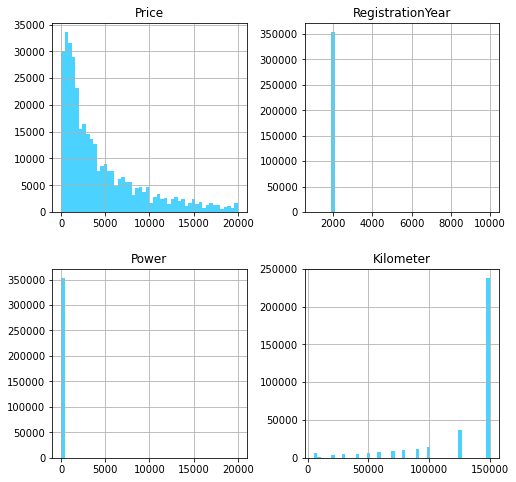

In [9]:
data.hist(figsize=(8, 8), bins=50, alpha=0.7, color='deepskyblue')
plt.show()

<div class='alert alert-success'> ✔️Красивая визуализация, для мощности и года можно было еще отдельно вывести гистограмму с параметром range, чтобы посмотреть детальнее на интересуемые диапазоны. 
</div>

Аномалиями здесь можно считать неправдоподобные значения года регистрации, мощности автомобилей и нулевые значения признаков.

Построим диаграммы размаха («ящики с усами») по распределению численных данных при помощи метода *.boxplot*.

Поясним особенности этой диаграммы.

«Ящик» ограничен первым и третьим квартилями (нижняя и верхняя стороны прямоугольника - границы ящика). Внутри ящика зелёной линией обозначена медиана (второй квартиль).
«Усы» простираются вниз и вверх от границ ящика (чёрные линии ниже и выше границ ящика) на расстояние, равное 1,5 межквартильного размаха (сокращённо *IQR*, от англ. *interquartile range*, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если верхний «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и нижнего «уса».

**1. Диаграмма размаха по распределению цены автомобиля (евро) вместе с выбросами.**

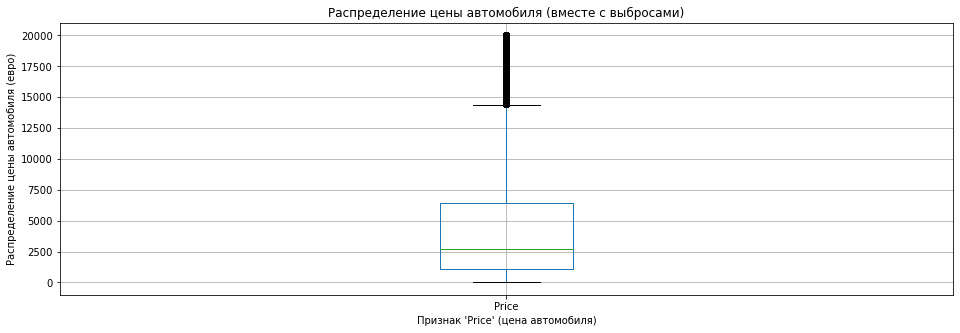

In [10]:
data.boxplot(column='Price', figsize=(16, 5))
plt.xlabel("Признак 'Price' (цена автомобиля)")
plt.ylabel('Распределение цены автомобиля (евро)')
plt.title('Распределение цены автомобиля (вместе с выбросами)')
plt.show()

**2. Диаграмма размаха по распределению года регистрации автомобиля вместе с выбросами.**

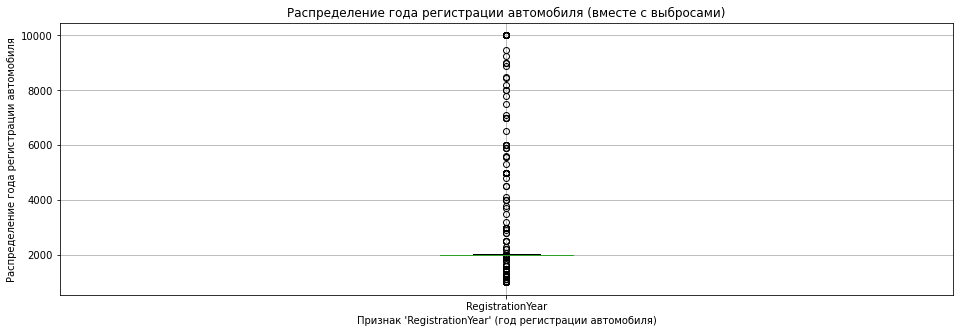

In [11]:
data.boxplot(column='RegistrationYear', figsize=(16, 5))
plt.xlabel("Признак 'RegistrationYear' (год регистрации автомобиля)")
plt.ylabel('Распределение года регистрации автомобиля')
plt.title('Распределение года регистрации автомобиля (вместе с выбросами)')
plt.show()

**3. Диаграмма размаха по распределению мощности автомобиля (л. с.) вместе с выбросами.**

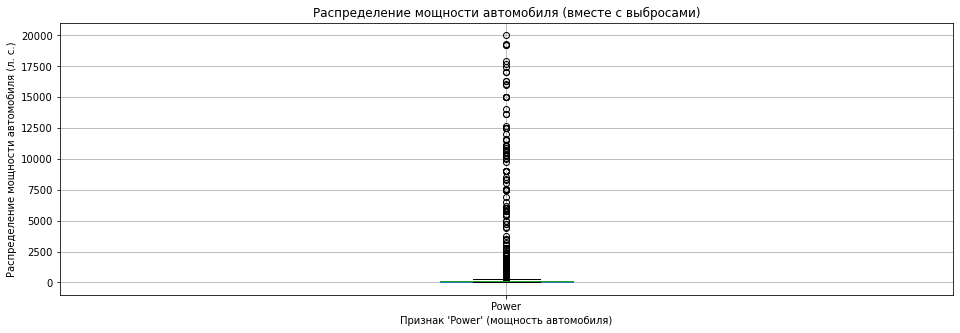

In [12]:
data.boxplot(column='Power', figsize=(16, 5))
plt.xlabel("Признак 'Power' (мощность автомобиля)")
plt.ylabel('Распределение мощности автомобиля (л. с.)')
plt.title('Распределение мощности автомобиля (вместе с выбросами)')
plt.show()

**4. Диаграмма размаха по распределению пробега автомобиля (км) вместе с выбросами.**

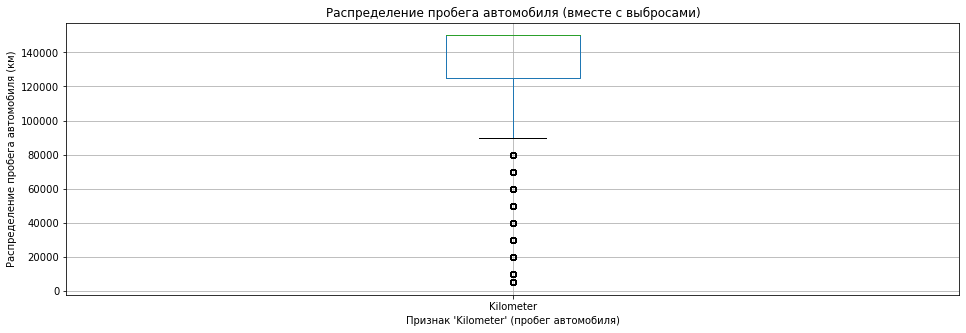

In [13]:
data.boxplot(column='Kilometer', figsize=(16, 5))
plt.xlabel("Признак 'Kilometer' (пробег автомобиля)")
plt.ylabel('Распределение пробега автомобиля (км)')
plt.title('Распределение пробега автомобиля (вместе с выбросами)')
plt.show()

Из-за выбросов сложно рассмотреть распределение внутри ящиков. Поэтому сделаем графики без выбросов, указав парамтер *showfliers=False*.

<div class='alert alert-success'> ✔️👍Подход к работе с визуализациями у тебя основательный)
</div>

**1. Диаграмма размаха по распределению цены автомобиля (евро) без выбросов.**

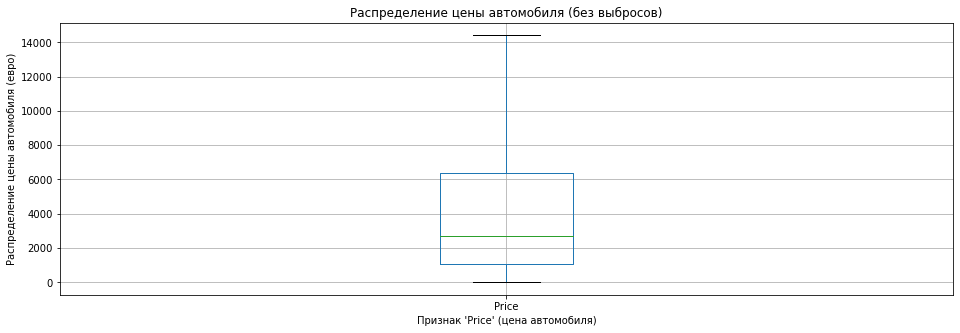

In [14]:
data.boxplot(column='Price', showfliers=False, figsize=(16, 5))
plt.xlabel("Признак 'Price' (цена автомобиля)")
plt.ylabel('Распределение цены автомобиля (евро)')
plt.title('Распределение цены автомобиля (без выбросов)')
plt.show()

**2. Диаграмма размаха по распределению года регистрации автомобиля без выбросов.**

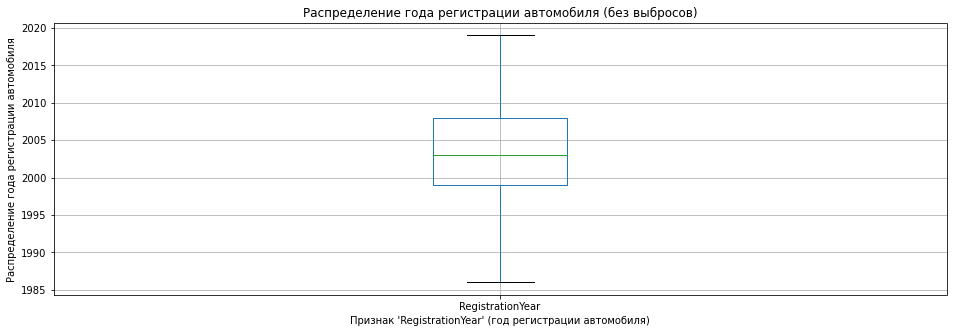

In [15]:
data.boxplot(column='RegistrationYear', showfliers=False, figsize=(16, 5))
plt.xlabel("Признак 'RegistrationYear' (год регистрации автомобиля)")
plt.ylabel('Распределение года регистрации автомобиля')
plt.title('Распределение года регистрации автомобиля (без выбросов)')
plt.show()

**3. Диаграмма размаха по распределению мощности автомобиля (л. с.) без выбросов.**

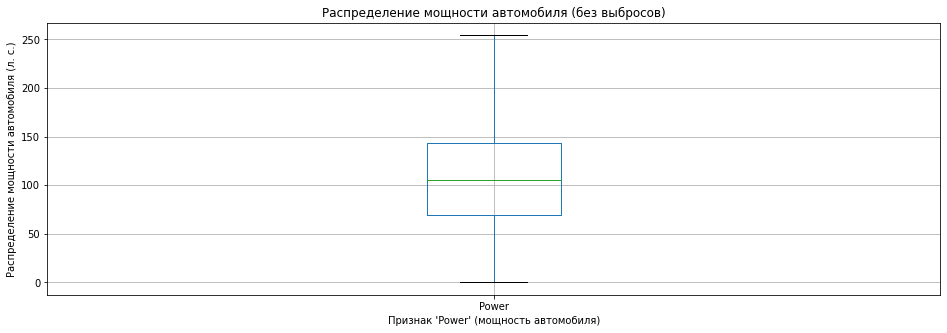

In [16]:
data.boxplot(column='Power', showfliers=False, figsize=(16, 5))
plt.xlabel("Признак 'Power' (мощность автомобиля)")
plt.ylabel('Распределение мощности автомобиля (л. с.)')
plt.title('Распределение мощности автомобиля (без выбросов)')
plt.show()

**4. Диаграмма размаха по распределению пробега автомобиля (км) без выбросов.**

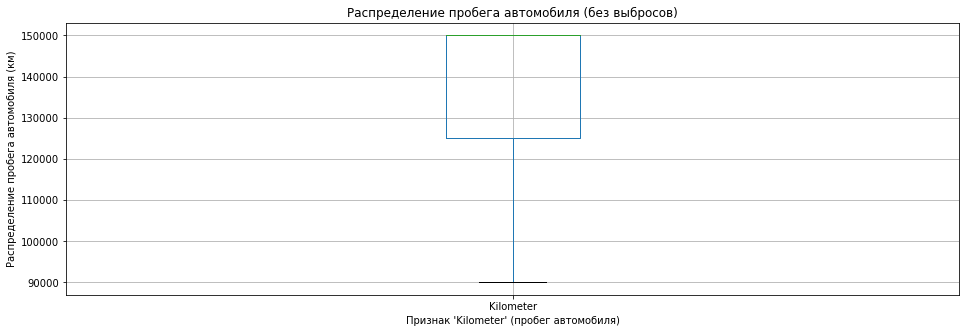

In [17]:
data.boxplot(column='Kilometer', showfliers=False, figsize=(16, 5))
plt.xlabel("Признак 'Kilometer' (пробег автомобиля)")
plt.ylabel('Распределение пробега автомобиля (км)')
plt.title('Распределение пробега автомобиля (без выбросов)')
plt.show()

Интересная ситуация получается для признака *Kilometer*: у него медиана и 75%-ый квартиль равны максимальному значению данных.

Выбросы в признаках *RegistrationYear* и *Power*, очевидно, необходимо корректировать.

Выведем коэффициенты корреляции Пирсона для переменных датасета.

In [18]:
data.corr()

,Price,RegistrationYear,Power,Kilometer
Price,1.000000,0.026916,0.158872,-0.333207
RegistrationYear,0.026916,1.000000,-0.000828,-0.053448
Power,0.158872,-0.000828,1.000000,0.024006
Kilometer,-0.333207,-0.053448,0.024006,1.000000


Построим тепловую карту (хитмэп) коэффициентов корреляции Пирсона для переменных датасета.


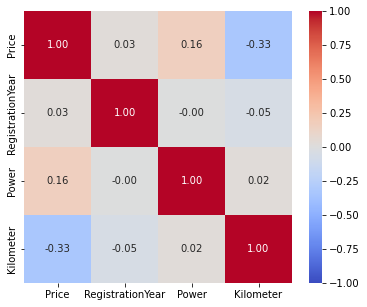

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(
    data.corr(), annot=True, fmt = '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

Наблюдается незначительная обратная корреляция между признаками *Kilometer* и *Price*, что логично. Чем больше пробег - тем ниже цена.

<div class='alert alert-warning'>⚠️После фильтрации выбросов корреляция станет более явной. Плюс пока заметна отрицательная корреляция с пробегом.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Исправила выше.
</div>

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
Вижу


</div>

### Обработаем аномалии в столбцах

Посмотрим состав численных признаков *Price*, *RegistrationYear*, *Power* и *Kilometer*.

In [20]:
data[['Price', 'RegistrationYear', 'Power', 'Kilometer']].describe()

,Price,RegistrationYear,Power,Kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


Аномалиями здесь можно считать неправдоподобные значения года регистрации автомобилей и нулевые значения признаков.

Посмотрим выборочно количество уникальных значений в признаках.

In [21]:
print(len(data['RegistrationYear'].unique()))
print(len(data['Model'].unique()))
print(len(data['Brand'].unique()))

151
251
40


Сохраним в датасете только те автомобили, год регистрации которых входит в диапазон с 1940 по 2022 гг.

In [22]:
data = data[(data['RegistrationYear'] <= 2016) & (data['RegistrationYear'] >= 1940)]
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
354364,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354365,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


<div class='alert alert-danger'>❌Хорошо, явно неправильные значения из RegistrationYear удалили. А как считаешь по  DateCrawled можно что-то сказать о верхней границе года регистрации?</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Посмотрим подробнее ниже.
</div>

In [23]:
display(pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Мои проекты/GitHubRepositories/'
                 'YandexPracticum/09_determining_the_cost_of_cars/autos.csv')[
    ['DateCrawled', 'RegistrationYear', 'DateCreated']])

,DateCrawled,RegistrationYear,DateCreated
0,2016-03-24 11:52:17,1993,2016-03-24 00:00:00
1,2016-03-24 10:58:45,2011,2016-03-24 00:00:00
2,2016-03-14 12:52:21,2004,2016-03-14 00:00:00
3,2016-03-17 16:54:04,2001,2016-03-17 00:00:00
4,2016-03-31 17:25:20,2008,2016-03-31 00:00:00
...,...,...,...
354364,2016-03-21 09:50:58,2005,2016-03-21 00:00:00
354365,2016-03-14 17:48:27,2005,2016-03-14 00:00:00
354366,2016-03-05 19:56:21,2000,2016-03-05 00:00:00
354367,2016-03-19 18:57:12,1996,2016-03-19 00:00:00


Даты скачивания и создания анкеты приходятся на 2016 год. Значит нужно удалить все строки, в которых автомобили были зарегистрированы позднее 2016 года.

Подправила дату в коде выше.

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
Правильно!
    


</div>

Повторно посмотрим количество уникальных значений в признаках.

In [24]:
print(len(data['RegistrationYear'].unique()))
print(len(data['Model'].unique()))
print(len(data['Brand'].unique()))

77
251
40


После удаления аномалий уменьшилось количество уникальных значений в признаке *RegistrationYear*. При этом количество уникальных значений в признаке *Model* не изменилось, что означает, что мы сохранили в датасете все возможные модели автомобилей, включая ретро автомобили.

Удалим нули в столбце *Price*, поставим ограничение на значения в *Power* и сбросим индекс в датасете.

In [25]:
data = data[data['Price'] != 0]
data = data[data['Power'] <= 1500]
data = data.reset_index(drop=True)
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
329479,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
329480,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
329481,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
329482,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


<div class='alert alert-warning'>⚠️ Ок, аномалии в цене и в мощности отфильтровали. Однако так как строк с нулевой мощностью достаточно много, можно было поработать с ними, как с пропусками и заполнить, например, медианой по бренду <a href = 'https://zen.yandex.ru/media/id/5ee6f73b7cadb75a66e4c7e3/zapolnenie-propuskov-kategorialnoi-modoi-6278da62f680416ea338bd9c'> по аналогии с категориальными модами </a>.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Исправила в коде ниже.
</div>

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
Молодец!


</div>

Посмотрим количество нулей в столбце *Power*.

In [26]:
data[data['Power'] == 0].shape

(32794, 10)

Заменим нули в столбце *Power* на медиану по бренду.

In [27]:
data.loc[data['Power'] == 0, 'Power'] = np.NaN
data['Power'] = data['Power'].fillna(
    data.groupby('Brand')['Power'].transform(lambda x: x.median() if x.median() else np.nan))
data[data['Power'] == 0].shape

(0, 10)

Повторно посмотрим количество уникальных значений в признаках.

In [28]:
print(len(data['RegistrationYear'].unique()))
print(len(data['Model'].unique()))
print(len(data['Brand'].unique()))

77
251
40


После удаления нулей количество уникальных значений в признаках *RegistrationYear* и *Model* не изменилось.

In [29]:
data[['Price', 'RegistrationYear', 'Power', 'Kilometer']].describe()

,Price,RegistrationYear,Power,Kilometer
count,329484.000000,329484.000000,329484.000000,329484.000000
mean,4607.664491,2002.620088,120.140456,128231.067366
std,4546.198371,6.771335,55.971133,37486.631643
min,1.000000,1940.000000,1.000000,5000.000000
25%,1200.000000,1999.000000,80.000000,125000.000000
50%,2900.000000,2003.000000,109.000000,150000.000000
75%,6600.000000,2007.000000,150.000000,150000.000000
max,20000.000000,2016.000000,1500.000000,150000.000000


### Заполним пропущенные значения в столбцах

Пропуски имеются у следующих признаков:
- *VehicleType* - тип автомобильного кузова,
- *Gearbox* - тип коробки передач,
- *Model* - модель автомобиля,
- *FuelType* - тип топлива,
- *Repaired* - была машина в ремонте или нет.

In [30]:
data.isna().sum()

Price                   0
VehicleType         19884
RegistrationYear        0
Gearbox             15542
Power                   0
Model               15573
Kilometer               0
FuelType            24099
Brand                   0
Repaired            59751
dtype: int64

Посмотрим состав признаков с пропусками.

In [31]:
data['VehicleType'].value_counts()

sedan          89334
small          77970
wagon          63652
bus            28328
convertible    19846
coupe          15621
suv            11784
other           3065
Name: VehicleType, dtype: int64

In [32]:
data['Gearbox'].value_counts()

manual    250987
auto       62955
Name: Gearbox, dtype: int64

In [33]:
data['Model'].value_counts()

golf                  26723
other                 23142
3er                   18663
polo                  12023
corsa                 11586
                      ...  
kalina                    6
rangerover                3
serie_3                   3
range_rover_evoque        2
serie_1                   1
Name: Model, Length: 250, dtype: int64

In [34]:
data['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'other', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'one', 'fortwo',
       '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta',
       'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'ka', 'a1', 'insignia',
       'combo', 'focus', 'tt', 'corsa', 'a6', 'jazz', 'omega', 'slk',
       '7er', '80', '147', '100', 'z_reihe', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'sharan', '6_reihe', 'c4', 'panda',
       'up', 'i_reihe', 'ceed', '5_reihe', 'yeti', 'octavia', 'zafira',
       'mii', 'rx_reihe', '6er', 'modus', 'fox', 'matiz', 'beetle', 'c1',
       'rio', 'to

In [35]:
data['FuelType'].value_counts()

petrol      204561
gasoline     94803
lpg           5021
cng            531
hybrid         220
other          162
electric        87
Name: FuelType, dtype: int64

In [36]:
data['Repaired'].value_counts()

no     236809
yes     32924
Name: Repaired, dtype: int64

Введём отдельную переменную *data_pass*, в которую сохраним копию преобразованного ранее исходного датасета. В новом датасете мы заполним пропущенные значения в столбцах.

У признаков *VehicleType*, *Model* и *FuelType* одним из значений является *'other'*, поэтому заменим пропуски в этих столбцах на дополнительную категорию *'another'*.

In [37]:
data_pass = data.copy()
data_pass['VehicleType'] = data_pass['VehicleType'].fillna('another')
data_pass['Model'] = data_pass['Model'].fillna('another')
data_pass['FuelType'] = data_pass['FuelType'].fillna('another')
data_pass

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,another,1993,manual,101.0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190.0,another,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
329479,1150,bus,2000,manual,101.0,zafira,150000,petrol,opel,no
329480,2200,another,2005,NaN,140.0,another,20000,another,sonstige_autos,NaN
329481,1199,convertible,2000,auto,101.0,fortwo,125000,petrol,smart,no
329482,9200,bus,1996,manual,102.0,transporter,150000,gasoline,volkswagen,no


Категориальные признаки *Gearbox* и *Repaired* принимают только два значения, т.е. являются бинарными. Для работы модели необходимы численные признаки, поэтому мы можем преобразовать значения этих признаков в числа *'0'* и *'1'*.

Сначала заполним пропуски в признаках *Gearbox* и *Repaired* случайными числами *'0'* или *'1'*. Для этого применим функцию *randint*, которая генерирует целые случайные числа в заданном диапазоне.

In [38]:
data_pass['Gearbox'] = data_pass['Gearbox'].fillna(
    pd.Series(np.random.randint(0, 2, size=len(data_pass)), index=data_pass.index))
data_pass['Repaired'] = data_pass['Repaired'].fillna(
    pd.Series(np.random.randint(0, 2, size=len(data_pass)), index=data_pass.index))

print(data_pass['Gearbox'].unique())
print(data_pass['Repaired'].unique())
display(data_pass)

['manual' 'auto' 0 1]
[0 'yes' 1 'no']


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,another,1993,manual,101.0,golf,150000,petrol,volkswagen,0
1,18300,coupe,2011,manual,190.0,another,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,gasoline,jeep,1
3,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
329479,1150,bus,2000,manual,101.0,zafira,150000,petrol,opel,no
329480,2200,another,2005,1,140.0,another,20000,another,sonstige_autos,0
329481,1199,convertible,2000,auto,101.0,fortwo,125000,petrol,smart,no
329482,9200,bus,1996,manual,102.0,transporter,150000,gasoline,volkswagen,no


<div class='alert alert-success'> ✔️Хорошо, где-то заполнили пропуски новой категорией, а где-то случайными значениями, посмотрим что получится.
</div>


Проверим датасет на наличие пропусков:

In [39]:
data_pass.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
dtype: int64

Затем преобразуем исходные категориальные значения признаков *Gearbox* и *Repaired* в числа *'0'* и *'1'*.

Для признака *Gearbox* обозначим:
- *'0'* - для *'manual'*,
- *'1'* - для *'auto'*.

Для признака *Repaired* обозначим:
- *'0'* - для *'no'*,
- *'1'* - для *'yes'*.

In [40]:
data_pass.loc[data_pass['Gearbox'] == 'manual', 'Gearbox'] = 0
data_pass.loc[data_pass['Gearbox'] == 'auto', 'Gearbox'] = 1

data_pass.loc[data_pass['Repaired'] == 'no', 'Repaired'] = 0
data_pass.loc[data_pass['Repaired'] == 'yes', 'Repaired'] = 1

display(data_pass)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,another,1993,0,101.0,golf,150000,petrol,volkswagen,0
1,18300,coupe,2011,0,190.0,another,125000,gasoline,audi,1
2,9800,suv,2004,1,163.0,grand,125000,gasoline,jeep,1
3,1500,small,2001,0,75.0,golf,150000,petrol,volkswagen,0
4,3600,small,2008,0,69.0,fabia,90000,gasoline,skoda,0
...,...,...,...,...,...,...,...,...,...,...
329479,1150,bus,2000,0,101.0,zafira,150000,petrol,opel,0
329480,2200,another,2005,1,140.0,another,20000,another,sonstige_autos,0
329481,1199,convertible,2000,1,101.0,fortwo,125000,petrol,smart,0
329482,9200,bus,1996,0,102.0,transporter,150000,gasoline,volkswagen,0


Преобразуем тип данных у признаков *Gearbox* и *Repaired* в *integer*:

In [41]:
data_pass['Gearbox'] = data_pass['Gearbox'].astype('int')
data_pass['Repaired'] = data_pass['Repaired'].astype('int')

In [42]:
data_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329484 entries, 0 to 329483
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             329484 non-null  int64  
 1   VehicleType       329484 non-null  object 
 2   RegistrationYear  329484 non-null  int64  
 3   Gearbox           329484 non-null  int32  
 4   Power             329484 non-null  float64
 5   Model             329484 non-null  object 
 6   Kilometer         329484 non-null  int64  
 7   FuelType          329484 non-null  object 
 8   Brand             329484 non-null  object 
 9   Repaired          329484 non-null  int32  
dtypes: float64(1), int32(2), int64(3), object(4)
memory usage: 22.6+ MB


<div class='alert alert-warning'>⚠️
Хорошо, однако в общем случае кодирование правильно настраивать (обучать) на тренировочной выборке (о других предполагаем, что модель ничего не знает), <a href='https://zen.yandex.ru/media/id/5ee6f73b7cadb75a66e4c7e3/ispolzovanie-vyborok-pri-validacii-modelei-62dfe3768b8cc365e117ae2c'> как здесь делается для логистической регрессии </a>. <br> То же относится и к шкалированию ниже.

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Я перенесла оба раздела вниз, сразу после деления датасета на выборки.
    
И остаётся непонятным. Если я не буду кодировать категориальные признаки в валидационной и тестовой выборках, то с ними не сможет работать модель *LightGBM*, т.к. она не воспринимает данные типа *object* (выдаёт ошибку). Поэтому я всё-таки провела кодирование для признаков валидационной и тестовой выборок. Масштабировать не стала.
</div>

<div class='alert alert-danger'>❌(2) Этот блок не обязателен для проекта (желтый цвет), поэтому можешь оставить как было. Если хочешь правильно, то правило такое:
    fit делается на train выборке, а transform на train, valid, test (можно для train сделать fit_transform = fit+transform), у тебя пока на всех fit_transform. <br> Для 2 выборок -  fit_transform на train и transform на test.
    Может возникнуть проблема наличия неизвестной категории в выборке valid и test (ведь кодировщик обучается на train), в этом случае используй параметры <a href='https://dzen.ru/media/id/5ee6f73b7cadb75a66e4c7e3/kodirovanie-neizvestnyh-kategorii-627f4f3237af4e7363bded9a'> как здесь</a>






</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента (2):</b> 
    
Я внесла изменения для кодирования признаков:
- оставила две выборки - *train_valid* (не стала переименовывать, чтобы не запутаться) и *test*, т.к. для моделей буду использовать только *GridSearchCV*;
- соответственно код для выборок *train* и *valid* закоментировала;
- для тестовой выборки оставила только метод *.transform*, а также прибавила дополнительные параметры:
    ```
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    ```
</div>

### Исследуем данные после итоговой предобработки

Посмотрим описание данных в итоговом датасете *data_pass*.

In [43]:
data_pass.describe()

,Price,RegistrationYear,Gearbox,Power,Kilometer,Repaired
count,329484.000000,329484.000000,329484.000000,329484.000000,329484.000000,329484.000000
mean,4607.664491,2002.620088,0.214648,120.140456,128231.067366,0.190613
std,4546.198371,6.771335,0.410578,55.971133,37486.631643,0.392785
min,1.000000,1940.000000,0.000000,1.000000,5000.000000,0.000000
25%,1200.000000,1999.000000,0.000000,80.000000,125000.000000,0.000000
50%,2900.000000,2003.000000,0.000000,109.000000,150000.000000,0.000000
75%,6600.000000,2007.000000,0.000000,150.000000,150000.000000,0.000000
max,20000.000000,2016.000000,1.000000,1500.000000,150000.000000,1.000000


При помощи гистограмм визуализируем распределение переменных в итоговом датасете *data_pass*.

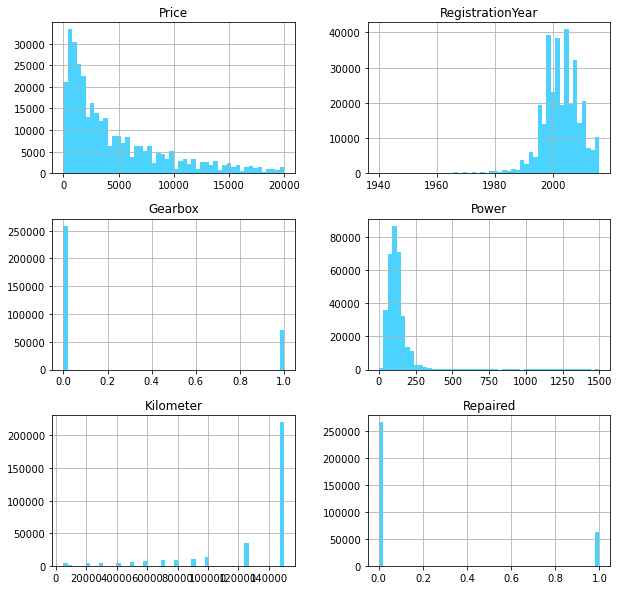

In [44]:
data_pass.hist(figsize=(10, 10), bins=50, alpha=0.7, color='deepskyblue')
plt.show()

Выведем коэффициенты корреляции Пирсона для переменных итогового датасета *data_pass*.

In [45]:
data_pass.corr()

,Price,RegistrationYear,Gearbox,Power,Kilometer,Repaired
Price,1.000000,0.447416,0.223465,0.459619,-0.354344,-0.234982
RegistrationYear,0.447416,1.000000,0.029311,0.113172,-0.231562,-0.115442
Gearbox,0.223465,0.029311,1.000000,0.360296,0.008103,-0.010967
Power,0.459619,0.113172,0.360296,1.000000,0.091374,-0.063301
Kilometer,-0.354344,-0.231562,0.008103,0.091374,1.000000,0.075890
Repaired,-0.234982,-0.115442,-0.010967,-0.063301,0.075890,1.000000


Построим тепловую карту (хитмэп) коэффициентов корреляции Пирсона для переменных датасета *data_pass*.

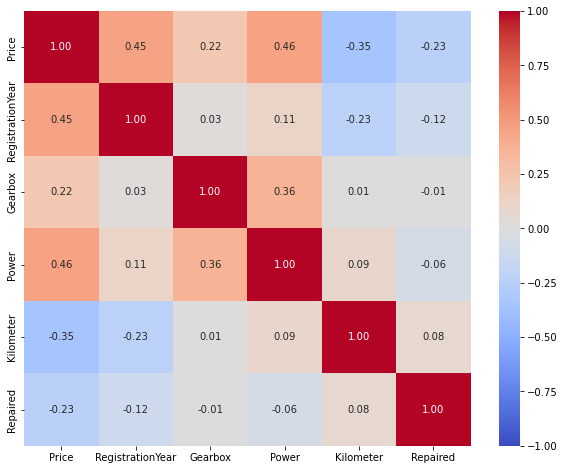

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(
    data_pass.corr(), annot=True, fmt = '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

Наблюдается незначительная прямая корреляция между признаками *RegistrationYear*, *Power* и *Price*, а также обратная корреляция между признаками *Kilometer* и *Price*, что логично. Чем новее автомобиль и больше мощность, тем выше цена. И, наоборот, чем больше пробег - тем ниже цена.

**Вывод**. 

В этом разделе были выполнены следующие задачи:
1. неинформативные признаки и явные дубликаты удалены;
2. аномалии в столбцах обработаны;
3. заполнены пропущенные значения в столбцах, и полученный датасет сохранён в отдельную переменную *data_pass*.

В результате выполнения задач этого раздела было выявлено следующее:
- после итоговой предобработки данных корреляция между признаками, в целом, по-прежнему отсутствует;
- распределения значений признаков стали более правдоподобными.

Таким образом, данные подготовлены для дальнейшей работы.

<div class='alert alert-danger'>❌Проделана большая исследовательская работа. Однако в отношении корреляции добавлю, что  корреляция с колонками, не имеющими естественный порядок (как те же Model, Brand), не даст правильных значений <a href='https://zen.yandex.ru/media/id/5ee6f73b7cadb75a66e4c7e3/korreliaciia-kogda-primeniat-mojno-a-kogda-opasno-625911e78c53d778c8b2fefd'> читай тут </a> Давай уберем это вывод выше. Можно было добавить вывод про корреляцию некоторых  признаков (упорядоченных) с ценой.

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Исправила.
</div>

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
ОК


</div>

## Обучение моделей

### Подготовим выборки для обучения моделей

#### Подготовим выборки из датасета ***data_pass*** с заполненными пропущенными значениями.

In [47]:
# Разобьём данные, выделив целевой признак:
features_pass = data_pass.drop('Price', axis=1)
target_pass = data_pass['Price']

Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1.

In [48]:
# Разделим полученые данные на обучающую выборку для применения Grid Search (train_grid) и тестовую выборку (20%):
features_pass_train_grid, features_pass_test, target_pass_train_grid, target_pass_test = train_test_split(
    features_pass, target_pass, test_size=0.20, random_state=RANDOM_STATE)

In [49]:
# Разделим промежуточную выборку (train_valid) на обучающую и валидационную 
# (25% от промежуточной выборки = 20% от исходного датасета):
features_pass_train, features_pass_valid, target_pass_train, target_pass_valid = train_test_split(
    features_pass_train_valid, target_pass_train_valid, test_size=0.25, random_state=RANDOM_STATE)

Данные из датасета *data_pass* подготовлены для модели градиентного бустинга *CatBoost*, т.к. *CatBoost* не распознаёт тип *NaN*.

#### Преобразуем категориальные признаки в численные

Посмотрим, какие категориальные признаки нужно преобразовать в численные.

In [50]:
data_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329484 entries, 0 to 329483
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             329484 non-null  int64  
 1   VehicleType       329484 non-null  object 
 2   RegistrationYear  329484 non-null  int64  
 3   Gearbox           329484 non-null  int32  
 4   Power             329484 non-null  float64
 5   Model             329484 non-null  object 
 6   Kilometer         329484 non-null  int64  
 7   FuelType          329484 non-null  object 
 8   Brand             329484 non-null  object 
 9   Repaired          329484 non-null  int32  
dtypes: float64(1), int32(2), int64(3), object(4)
memory usage: 22.6+ MB


Итак, в численные данные необходимо преобразовать признаки *VehicleType*, *Model*, *FuelType* и *Brand*.

Преобразуем категориальные признаки в численные на тренировочной и промежуточной выборках с помощью техники порядкового кодирования *(Ordinal Encoding)*.

Введём отдельные переменные *features_ordinal_scaler_train_valid*, *features_ordinal_scaler_train*, *features_ordinal_valid* и *features_ordinal_test*, в которые сохраним копии преобразованных ранее признаков *features_pass_train_valid*, *features_pass_train*, *features_pass_valid* и *features_pass_test* для промежуточной и обучающей выборок. В новых датасетах мы преобразуем категориальные признаки в численные с помощью техники порядкового кодирования и масштабируем численные признаки для тренировочной (*train*) и промежуточной (*train_valid*) выборок.

In [51]:
# выполним порядковое кодирование для выборок train_valid и test:

categorical_features = [
    'VehicleType', 
    'Model', 
    'FuelType', 
    'Brand',
]

features_ordinal_scaler_train = features_pass_train.copy()
features_ordinal_scaler_valid = features_pass_valid.copy()

features_ordinal_scaler_train_valid = features_pass_train_valid.copy()
features_ordinal_scaler_test = features_pass_test.copy()

# создаём объект структуры данных OrdinalEncoder()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 

# Для моделей без Grid Search:
features_ordinal_scaler_train[categorical_features] = encoder.fit_transform(
    features_ordinal_scaler_train[categorical_features])

features_ordinal_scaler_valid[categorical_features] = encoder.transform(
    features_ordinal_scaler_valid[categorical_features])


# Для моделей с Grid Search:
# на обучающих данных получим список категориальных признаков с помощью метода fit() и преобразуем данные с помощью transform()
features_ordinal_scaler_train_valid[categorical_features] = encoder.fit_transform(
    features_ordinal_scaler_train_valid[categorical_features])

# преобразуем данные
features_ordinal_scaler_test[categorical_features] = encoder.transform(
    features_ordinal_scaler_test[categorical_features])

display(features_ordinal_scaler_train.head())
display(features_ordinal_scaler_valid.head())
display(features_ordinal_scaler_train_valid.head())
display(features_ordinal_scaler_test.head())

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
3013,5.0,2008,0,344.0,141.0,125000,7.0,30.0,0
171444,2.0,1997,1,193.0,209.0,80000,7.0,20.0,0
106679,5.0,2006,0,177.0,15.0,150000,7.0,2.0,0
314549,6.0,2001,0,101.0,129.0,150000,0.0,10.0,0
36844,6.0,2000,0,75.0,40.0,150000,7.0,33.0,1


,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
191192,0.0,1970,1,90.0,40.0,100000,0.0,24.0,1
632,5.0,2010,0,170.0,60.0,90000,3.0,20.0,0
162535,6.0,2009,0,60.0,170.0,50000,7.0,9.0,0
219412,6.0,2001,0,50.0,144.0,80000,7.0,38.0,0
264597,5.0,2002,0,75.0,117.0,150000,7.0,38.0,0


#### Масштабируем численные признаки на выборке *train_valid*

In [56]:
# выделим численные признаки, которые необходимо масштабировать
numeric = ['VehicleType', 'RegistrationYear', 'Power', 'Model', 'Kilometer', 'FuelType', 'Brand']

pd.options.mode.chained_assignment = None

# создаём объект структуры данных StandardScaler()
scaler = StandardScaler() 
# настроим объект на обучающих данных (вычислим среднее и дисперсию) с помощью метода fit()
scaler.fit(features_ordinal_scaler_train_valid[numeric])

# преобразуем данные
features_ordinal_scaler_train_valid[numeric] = scaler.transform(features_ordinal_scaler_train_valid[numeric])
features_ordinal_scaler_test[numeric] = scaler.transform(features_ordinal_scaler_test[numeric])

features_ordinal_scaler_train[numeric] = scaler.transform(features_ordinal_scaler_train[numeric])
features_ordinal_scaler_valid[numeric] = scaler.transform(features_ordinal_scaler_valid[numeric])

# выведем датафреймы
display("Выборка 'train_valid'", features_ordinal_scaler_train_valid.head())
display("Выборка 'test'", features_ordinal_scaler_test.head())

display("Выборка 'train'", features_ordinal_scaler_train.head())
display("Выборка 'valid'", features_ordinal_scaler_valid.head())

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
3013,0.017428,0.795424,0,4.015624,0.487319,-0.086436,0.733813,0.689971,0
171444,-1.234430,-0.830153,1,1.307973,1.446049,-1.287022,0.733813,-0.062175,0
106679,0.017428,0.499864,0,1.021070,-1.289152,0.580556,0.733813,-1.416038,0
314549,0.434714,-0.239034,0,-0.341721,0.318131,0.580556,-2.275849,-0.814321,0
36844,0.434714,-0.386814,0,-0.807939,-0.936678,0.580556,0.733813,0.915614,1


,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
191192,-2.069002,-4.820207,1,-0.538967,-0.936678,-0.753428,-2.275849,0.238683,1
632,0.017428,1.090983,0,0.895550,-0.654698,-1.020225,-0.985994,-0.062175,0
162535,0.434714,0.943204,0,-1.076911,0.896189,-2.087412,0.733813,-0.889536,0
219412,0.434714,-0.239034,0,-1.256226,0.529616,-1.287022,0.733813,1.291687,0
264597,0.017428,-0.091255,0,-0.807939,0.148943,0.580556,0.733813,1.291687,0


In [57]:
features_ordinal_scaler_train_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263587 entries, 3013 to 217570
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   VehicleType       263587 non-null  float64
 1   RegistrationYear  263587 non-null  float64
 2   Gearbox           263587 non-null  int32  
 3   Power             263587 non-null  float64
 4   Model             263587 non-null  float64
 5   Kilometer         263587 non-null  float64
 6   FuelType          263587 non-null  float64
 7   Brand             263587 non-null  float64
 8   Repaired          263587 non-null  int32  
dtypes: float64(7), int32(2)
memory usage: 18.1 MB


<div class='alert alert-danger'>❌(2) Масштабирование настраивается как писал выше для кодирования, у тебя пока дважды обучается...







</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента (2):</b> 
    
Я оставила выборку *train_valid*, а *train* закомментировала, т.к. для моделей буду использовать только *GridSearchCV*;

**Не понятно, почему у меня здесь данные дважды обучаются? Ведь для выполнения масштабирования нужны одновременно и *.fit*, и *.transform*.**
      
</div>

<div class='alert alert-info'> <strong>Ревьюер(3)</strong> <br>
До этого дважды fit было в разных блоках, поэтому писал, сейчас правильно.


</div>

In [59]:
# features_ordinal_scaler_train.info()

Признаки *features_ordinal_scaler_train_valid* и *features_ordinal_scaler_train* подготовлены для обучения моделей градиентного бустинга *LightGBM* и *случайного леса*. Эти модели не распознают данные типа *object* (присутствующие в датасета *data_pass*).
Кодировать и масштабировать можно только их.

<div class='alert alert-warning'>⚠️Хорошо, что сформированы выборки с одинаковыми условиями (сид, размер). Но чтобы исключить ошибки идентичности разбиения, правильно делать это один раз  (<a href='https://teletype.in/@dt_analytic/ILlCaWreRgO'> как здесь </a>)

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Мне пока сложно разобраться в этом материале. Посмотрю позднее, т.к. хотелось бы сдать проект до новогодних праздников. И в вопросе преобразования категориальных признаков в численные и их последующего масштабирования возникла загвоздка с применением *Grid Search*. Он сам делит выборку на тренировочную и валидационную, а значит для использования *Grid Search* преобразованы будут обе выборки. Мне посоветовали в такой ситуации использовать Pipeline. Мы его не изучали в практикуме, и я сним знакома поверхностно. Сейчас пока не готова написать код. Разбираться с ним тоже буду на праздниках. А пока для *Grid Search* буду использовать полностью преобразованную промежуточную выборку *train_valid*.

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
С пайплайнами проще, но сначала лучше понимать, что происходит внутри, поэтому лучше сделать вручную <a href='https://teletype.in/@dt_analytic/JZ73qgdJIl1'>(про пайплайны можешь почитать здесь)</a> <br>
    По поводу Grid Search ... Если бы ты везде использовала grid search и нигде не применяла тестовую выборку (до финального тестирования лучшей модели), то можно было обойтись двумя выборками, можешь так и сделать в новой версии. Как получать метрики валидационную ошибку и время предсказания/тестирования я писал ниже (у тебя получилось). То есть ты делаешь grid search на train, считаешь метрики из результатов grid search, а в самом конце проводишь тест лучшей модели.
    <br> В целом, помни, что желтые блоки не обязательны для корректировки.


</div>

### Обучим разные модели

Обучим разные модели, одна из которых — *LightGBM*, как минимум одна — не бустинг. Для каждой модели попробуем разные гиперпараметры.

Для наглядности напишу ниже какие переменные, где и почему я буду использовать далее для обучения моделей.

Для Catboost (+ NaN):

- **features_pass_train_valid**
- target_pass_train_valid
- features_pass_test
- target_pass_test
-
- **features_pass_train**
- target_pass_train
- features_pass_valid
- target_pass_valid


Для LightGBM (+ object) и случайного леса:

- **features_ordinal_scaler_train_valid**
- target_pass_train_valid
- **features_ordinal_test**
- target_pass_test
-
- **features_ordinal_scaler_train**
- target_pass_train
- **features_ordinal_valid**
- target_pass_valid

In [60]:
# задаём параметры для кроссвалидации
kf = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)

#### Модель градиентного бустинга ***LightGBM*** для задачи регрессии

Для модели градиентного бустинга *LightGBM* возьмём преобразованные данные *_ordinal_scaler*, т.к. *LightGBM* не воспринимает данные типа *object*.

In [61]:
# %%time


# # создадим модель LightGBM для задачи регрессии:
# model_lgbm = LGBMRegressor(
#     num_boost_round=100, # количество деревьев (итераций)
#     max_depth=10, # максимальная глубина дерева
#     random_state=RANDOM_STATE, 
#     learning_rate=0.15, # коэффициент скорости обучения (размер шага градиентного спуска)
#     early_stopping_rounds=10, # контроль переобучения
# )

# # обучим модель:
# start = time.time() # старт отсчёта времени обучения
# model_lgbm.fit(features_ordinal_scaler_train, target_pass_train, 
#                eval_set=[(features_ordinal_valid, target_pass_valid),], 
#                eval_metric='rmse', 
#                verbose=10)
# end = time.time() # отметка завершения отсчёта времени обучения
# fit_time_lgbm = end - start # время обучения модели

# # получим предсказания:
# predictions = model_lgbm.predict(features_ordinal_valid)
# predict_time_lgbm = time.time() - end # время предсказания

# # получим метрику RMSE:
# rmse_lgbm = mean_squared_error(
#     target_pass_valid, predictions, squared=False) # параметр squared=False возвращает RMSE

# print('RMSE модели LightGBM:', f'{rmse_lgbm:.0f}')
# print('Время обучения модели:', f'{fit_time_lgbm:.2f} s')
# print('Время предсказания модели:', f'{predict_time_lgbm:.2f} s')

Наилучшая модель градиентного бустинга ***LightGBM*** имеет метрику оценки качества ***RMSE = 4696*** при количестве деревьев (итераций) *num_boost_round = 100* и глубине дерева *max_depth = 10*.

Время обучения модели: ***1.16 s***.

Время предсказания модели: ***0.01 s***.

<div class='alert alert-danger'>❌ Ок, запустила обучение для LightGBM, но тестовую выборку до этапа тестирования использовать нельзя, так как на ней измеряется качество лучшей модели. Я бы закомменировал это блок, так как есть ниже с подбором гиперпараметров для LightGBM. 

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Я заменила тестовые переменные на валидационные, обучила модель и затем закомментировала код. *RMSE* всё равно получился плохой.
</div>

<div class='alert alert-danger'>❌(2)Лучше верни как было здесь, убери predict на features_ordinal_valid и посчитай метрики 
    <a href='https://teletype.in/@dt_analytic/Uqbu9e59UYa'>как здесь </a> (выше рекомендовал предалать на схему с двумя выборками).
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента (2):</b> 
    
Я решила последовать твоему совету и оставила только обучение с *GridSearchCV*. Остальные данные - закомментировала.
    
Для *features_ordinal_valid* выше я, по идее, применила только метод *.transform*. Но я эту часть закоментировала.
    
**Не понятно, почему нужно убрать *predict* на *features_ordinal_valid*? На чём тогда здесь нужно строить предсказания?**
</div>

<div class='alert alert-info'> <strong>Ревьюер(3)</strong> <br>
Predict советовал убрать, так как у нас с двумя выборками не будет features_ordinal_valid. А в целом тебе предсказания на валидации не нужны. Нас больше интересует оценка ошибки, чтобы выбрать лучшую модель, а ошибку тебе GridSearchCV сама посчитает на внутренней кросс-валидации.

</div>

#### Модель градиентного бустинга ***LightGBM*** для задачи регрессии с ***Grid Search***

In [62]:
%%time


# создадим модель LightGBM для задачи регрессии:
model_lgbm_gscv = LGBMRegressor(random_state=RANDOM_STATE)

# создадим словарь с гиперпараметрами для модели:
parameters = { 'metric': ['rmse'], # рассчитываемая метрика
              'boosting_type': ['gbdt'], # ['dart'] (тип алгоритма)
              'n_estimators': [200, 500], # количество деревьев
              'max_depth': [6, 8] } # максимальная глубина дерева

# подберём гиперпараметры с помощью GridSearchCV:
lgbm_gscv_result = GridSearchCV(model_lgbm_gscv, parameters, cv=kf, scoring='neg_root_mean_squared_error', verbose=50)

# обучим модель:
lgbm_gscv_result.fit(features_ordinal_scaler_train_valid, target_pass_train_valid)

# получим предсказания:
predictions = lgbm_gscv_result.predict(features_ordinal_scaler_train_valid)


print('RMSE наилучшей модели LightGBM c GridSearchCV:', f'{abs(lgbm_gscv_result.best_score_):.0f}')
print('Наилучшая модель LightGBM c GridSearchCV:', lgbm_gscv_result.best_estimator_)
print('Параметры наилучшей модели LightGBM c GridSearchCV:', lgbm_gscv_result.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 1/5; 1/4] END boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200;, score=-1721.659 total time=   1.8s
[CV 2/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 2/5; 1/4] END boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200;, score=-1722.912 total time=   1.1s
[CV 3/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 3/5; 1/4] END boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200;, score=-1715.533 total time=   1.0s
[CV 4/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 4/5; 1/4] END boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200;, score=-1713.506 total time=   0.9s
[CV 5/5; 1/4] START boosting_type=gbdt, max_depth=6, metric=rmse, n_estimators=200
[CV 5/5; 1/4] END boosting_type=gbdt, max_depth=6, me

In [63]:
# 1-й способ узнать время обучения и предсказания модели:
lgbm_gscv_res = pd.DataFrame(lgbm_gscv_result.cv_results_).sort_values(by='rank_test_score')
lgbm_gscv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_boosting_type,param_max_depth,param_metric,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,1.350833,0.043914,0.141024,0.004243,gbdt,8,rmse,500,"{'boosting_type': 'gbdt', 'max_depth': 8, 'met...",-1649.093042,-1656.792375,-1641.707023,-1649.891160,-1645.016280,-1648.499976,5.085889,1
1,1.401699,0.112971,0.163000,0.012378,gbdt,6,rmse,500,"{'boosting_type': 'gbdt', 'max_depth': 6, 'met...",-1663.387805,-1670.636718,-1653.676055,-1665.199979,-1660.644641,-1662.709040,5.574408,2
2,0.744714,0.078988,0.075853,0.007883,gbdt,8,rmse,200,"{'boosting_type': 'gbdt', 'max_depth': 8, 'met...",-1704.360988,-1713.158545,-1703.998900,-1704.206646,-1701.199255,-1705.384867,4.057262,3
0,1.134898,0.369087,0.094398,0.004408,gbdt,6,rmse,200,"{'boosting_type': 'gbdt', 'max_depth': 6, 'met...",-1721.659499,-1722.912127,-1715.533286,-1713.505963,-1711.634546,-1717.049084,4.467657,4


In [64]:
# 2-й способ узнать время обучения и предсказания модели:
lgbm_gscv_res2 = pd.DataFrame(lgbm_gscv_result.cv_results_).iloc[lgbm_gscv_result.best_index_]
lgbm_gscv_res2

mean_fit_time                                                   1.350833
std_fit_time                                                    0.043914
mean_score_time                                                 0.141024
std_score_time                                                  0.004243
param_boosting_type                                                 gbdt
param_max_depth                                                        8
param_metric                                                        rmse
param_n_estimators                                                   500
params                 {'boosting_type': 'gbdt', 'max_depth': 8, 'met...
split0_test_score                                           -1649.093042
split1_test_score                                           -1656.792375
split2_test_score                                           -1641.707023
split3_test_score                                            -1649.89116
split4_test_score                                  

In [65]:
print('Время обучения модели:', f'{lgbm_gscv_res.iloc[0]["mean_fit_time"]:.2f} s')
print('Время предсказания модели:', f'{lgbm_gscv_res.iloc[0]["mean_score_time"]:.2f} s')

Время обучения модели: 1.35 s
Время предсказания модели: 0.14 s


Наилучшая модель градиентного бустинга ***LightGBM*** с *GridSearchCV* имеет метрику оценки качества ***RMSE = 1650*** при количестве деревьев (итераций) *n_estimators = 500* и глубине дерева *max_depth = 8*.

Время обучения модели: ***1.85 s***.

Время предсказания модели: ***0.17 s***.

<div class='alert alert-danger'>❌
Здесь давай тоже уберем тестовую выборку, будем извлекать метрику ошибки на валидации, как ты делаешь из best_score_, а время <a href='https://dzen.ru/media/id/5ee6f73b7cadb75a66e4c7e3/kliuchevye-pliushki-ot-podbora-giperparametrov-v-sklearn-63464daff5b09e156159e05a'>так </a> . Обрати внимание, время обучения у тебя здесь заменяется временем подбора гиперпараметров (а нам надо именно время обучения).

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 

Время исправила. Не совсем поняла, о какой метрике идёт речь.
    
Вопрос. При использовании *Grid Search* для предсказаний используется эта же выборка, или можно подставить тестовую?
</div>

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
Тестовая не нужна тебе до финального тестирования ее не надо использовать, все метрики (и время обучения, и предсказания, и ошибка валидации) получаются после fit-а grid search-а на train. 
mean_fit_time, mean_score_time и best_score_ (ты выводишь выше).
Сделай так для всех алгоритмов с выводом значений (еще лучше собери в датафрейм, чтобы потом легче сравнивать было)
</div>

#### Модель градиентного бустинга ***CatBoost*** для задачи регрессии

Для модели градиентного бустинга *CatBoost* возьмём данные из датасета *data_pass* c заполненными пропусками, т.к. *CatBoost* не распознаёт тип *NaN*.

In [66]:
data_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329484 entries, 0 to 329483
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             329484 non-null  int64  
 1   VehicleType       329484 non-null  object 
 2   RegistrationYear  329484 non-null  int64  
 3   Gearbox           329484 non-null  int32  
 4   Power             329484 non-null  float64
 5   Model             329484 non-null  object 
 6   Kilometer         329484 non-null  int64  
 7   FuelType          329484 non-null  object 
 8   Brand             329484 non-null  object 
 9   Repaired          329484 non-null  int32  
dtypes: float64(1), int32(2), int64(3), object(4)
memory usage: 22.6+ MB


In [67]:
# выделим категориальные признаки в датасете data_pass
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

In [68]:
# %%time


# # создадим модель CatBoost для задачи регрессии:
# model_cat = CatBoostRegressor(
#     loss_function='RMSE', # функция потерь
#     iterations=101, # количество деревьев (итераций)
#     depth=8, # глубина дерева
#     random_seed=RANDOM_STATE,
#     learning_rate=0.15, # коэффициент скорости обучения (размер шага градиентного спуска)
#     early_stopping_rounds=10, # контроль переобучения
#     l2_leaf_reg=4, # борьба с переобучением
#     use_best_model=True
# )

# # обучим модель:
# start = time.time() # старт отсчёта времени обучения
# model_cat.fit(features_pass_train, target_pass_train, 
#               cat_features=cat_features,
#               eval_set=(features_pass_valid, target_pass_valid),
#               verbose=50, 
#               plot=True)
# end = time.time() # отметка завершения отсчёта времени обучения
# fit_time_cat = end - start # время обучения модели

# # получим предсказания:
# predictions = model_cat.predict(features_pass_valid)
# predict_time_cat = time.time() - end # время предсказания

# # получим метрику RMSE:
# rmse_cat = mean_squared_error(target_pass_valid, predictions, squared=False) # параметр squared=False возвращает RMSE

# print('RMSE модели CatBoost:', f'{rmse_cat:.0f}')
# print('Количество деревьев, после которого наступает переобучение:', model_cat.tree_count_)
# print('Лучший результат модели:', model_cat.get_best_score())
# print('Время обучения модели:', f'{fit_time_cat:.2f} s')
# print('Время предсказания:', f'{predict_time_cat:.2f} s')

Наилучшая модель градиентного бустинга ***CatBoost*** имеет метрику оценки качества ***RMSE = 1738*** при количестве деревьев *bestIteration = 100* и глубине дерева *depth = 8*.

Время обучения модели: ***8.65 s***.

Время предсказания модели: ***0.08 s***.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Выше я тоже заменила тестовые переменные на валидационные, обучила модель и затем закомментировала код.
</div>

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
По сути, блок выше тебе не нужен. Из-за него тебе пришлось делать три выборки, так как если используешь две до теста (и тренировочную и валидационную). Для всех алгоритмов делай grid search с выводом 3 метрик и тогда тебе понадобятся только 2 выборки 
</div>

#### Модель градиентного бустинга ***CatBoost***  для задачи регрессии с ***Grid Search***

**Вариант №1.**

Используем функцию ***GridSearchCV***.

In [69]:
%%time


# создадим модель CatBoost для задачи регрессии:
model_cat_gscv = CatBoostRegressor(
    random_seed=RANDOM_STATE,
    learning_rate=0.15, # коэффициент скорости обучения (размер шага градиентного спуска)
    early_stopping_rounds=10, # контроль переобучения
    l2_leaf_reg=4, # борьба с переобучением
    cat_features=cat_features
)

# создадим словарь с гиперпараметрами для модели:
parameters  = {
    'iterations': [100, 200], 
    'depth': [6, 8],
    'verbose': [50]
}

# подберём гиперпараметры с помощью GridSearchCV:
cat_gscv_result = GridSearchCV(model_cat_gscv, parameters, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1)

# обучим модель:
cat_gscv_result.fit(features_pass_train_valid, target_pass_train_valid)

# получим предсказания:
predictions = cat_gscv_result.predict(features_pass_train_valid)


print('RMSE наилучшей модели CatBoost c GridSearchCV:', f'{abs(cat_gscv_result.best_score_):.0f}')
print('Наилучшая модель CatBoost c GridSearchCV:', cat_gscv_result.best_estimator_)
print('Параметры наилучшей модели CatBoost c GridSearchCV:', cat_gscv_result.best_params_)

0:	learn: 4080.8521902	total: 292ms	remaining: 58.2s
50:	learn: 1778.1529901	total: 7.19s	remaining: 21s
100:	learn: 1696.1479597	total: 14.1s	remaining: 13.9s
150:	learn: 1652.0491187	total: 22.5s	remaining: 7.31s
199:	learn: 1622.0795815	total: 30.3s	remaining: 0us
RMSE наилучшей модели CatBoost c GridSearchCV: 1686
Наилучшая модель CatBoost c GridSearchCV: <catboost.core.CatBoostRegressor object at 0x00000124069E7BE0>
Параметры наилучшей модели CatBoost c GridSearchCV: {'depth': 8, 'iterations': 200, 'verbose': 50}
CPU times: total: 3min 27s
Wall time: 1min 48s


In [70]:
# 1-й способ узнать время обучения и предсказания модели:
cat_gscv_res = pd.DataFrame(cat_gscv_result.cv_results_).sort_values(by='rank_test_score')
cat_gscv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_verbose,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,70.298258,0.204364,0.305830,0.066619,8,200,50,"{'depth': 8, 'iterations': 200, 'verbose': 50}",-1678.090845,-1682.341992,-1698.270899,-1686.234579,8.686112,1
1,61.507109,0.319372,0.512654,0.055028,6,200,50,"{'depth': 6, 'iterations': 200, 'verbose': 50}",-1724.493573,-1717.321763,-1740.028617,-1727.281317,9.477304,2
2,36.848244,0.634263,0.569545,0.028582,8,100,50,"{'depth': 8, 'iterations': 100, 'verbose': 50}",-1738.756058,-1736.713011,-1758.493884,-1744.654318,9.821531,3
0,30.843350,0.582061,0.623006,0.020200,6,100,50,"{'depth': 6, 'iterations': 100, 'verbose': 50}",-1792.175974,-1787.225264,-1810.851168,-1796.750802,10.173253,4


In [71]:
# 2-й способ узнать время обучения и предсказания модели:
cat_gscv_res2 = pd.DataFrame(cat_gscv_result.cv_results_).iloc[cat_gscv_result.best_index_]
cat_gscv_res2

mean_fit_time                                             70.298258
std_fit_time                                               0.204364
mean_score_time                                             0.30583
std_score_time                                             0.066619
param_depth                                                       8
param_iterations                                                200
param_verbose                                                    50
params               {'depth': 8, 'iterations': 200, 'verbose': 50}
split0_test_score                                      -1678.090845
split1_test_score                                      -1682.341992
split2_test_score                                      -1698.270899
mean_test_score                                        -1686.234579
std_test_score                                             8.686112
rank_test_score                                                   1
Name: 3, dtype: object

In [72]:
print('Время обучения модели:', f'{cat_gscv_res.iloc[0]["mean_fit_time"]:.2f} s')
print('Время предсказания модели:', f'{cat_gscv_res.iloc[0]["mean_score_time"]:.2f} s')

Время обучения модели: 70.30 s
Время предсказания модели: 0.31 s


Наилучшая модель градиентного бустинга ***CatBoost*** с *GridSearchCV* имеет метрику оценки качества ***RMSE = 1686*** при количестве деревьев *iterations = 200* и глубине дерева *depth = 8*.

Время обучения модели: ***70.30 s***.

Время предсказания модели: ***0.31 s***.

<div class='alert alert-danger'>❌Хорошо, рассмотрена CatBoost. Просьба здесь тоже переделать как для LightGBM.

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Переделала.
</div>

<div class='alert alert-info'> <strong>Ревьюер(3)</strong> <br>
Отлично!

</div>

**Вариант №2.**

Используем метод ***.grid_search***.

In [73]:
# %%time


# # создадим модель CatBoost для задачи регрессии:
# model_cat_grid = CatBoostRegressor(
#     loss_function='RMSE', # функция потерь
#     iterations=51, # количество деревьев (итераций)
#     random_seed=RANDOM_STATE,
#     early_stopping_rounds=10, # контроль переобучения
#     cat_features=cat_features, # категориальные признаки в датасете
#     verbose=False
# )

# # создадим словарь с гиперпараметрами для модели:
# parametrs  = {'learning_rate': [0.1, 0.15, 0.3], # коэффициент скорости обучения (размер шага градиентного спуска)
#               'depth': [6, 10], # глубина дерева
#               'l2_leaf_reg': [1, 3, 5], # борьба с переобучением
#               'penalties_coefficient': [1, 2]
#               }

# # подберём гиперпараметры с помощью метода .grid_search:
# cat_grid_result = model_cat_grid.grid_search(parametrs, 
#                                            features_pass_train_valid, 
#                                            target_pass_train_valid, 
#                                            cv=kf, 
#                                            verbose=False, 
#                                            plot=True)

# display('Параметры наилучшей модели CatBoost c .grid_search:', cat_grid_result)

<div class='alert alert-success'> ✔️👍Есть и запуск встроенного перебора гиперпараметров.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Алан, подскажи, эту модели (выше) нельзя обучить с помощью метода *.fit* и сделать предскакзания (ниже), чтобы вывести время обучения и пердсказания модели? При запуске у меня появляется ошибка, поэтому я закоментировала код.
</div>

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
Можно, но для сдачи тебе это не надо, выше в комментариях писал, как лучше сделать.
</div>

In [74]:
# # обучим модель:
# start = time.time() # старт отсчёта времени обучения
# cat_grid_result.fit(features_pass_train, target_pass_train)
# end = time.time() # отметка завершения отсчёта времени обучения
# fit_time_cat_grid = end - start # время обучения

In [75]:
# # получим предсказания:
# predictions = cat_grid_result.predict(features_pass_test)
# predict_time_cat_grid = time.time() - end # время предсказания

Наилучшая модель градиентного бустинга ***CatBoost*** с *.grid_search* имеет метрику оценки качества ***RMSE = 1704*** при количестве деревьев *iterations = 50* и глубине дерева *depth = 10*.

При использовании метода *.grid_search* невозможно обучить модель, а значит - получить предсказания. Поэтому здесь нельзя вывести время обучения и предсказания модели.

#### Модель случайного леса для задачи регрессии с ***GridSearchCV***

Для модели случайного леса возьмём преобразованные данные *_ordinal_scaler*.

In [76]:
features_ordinal_scaler_train_valid

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
3013,0.017428,0.795424,0,4.015624,0.487319,-0.086436,0.733813,0.689971,0
171444,-1.234430,-0.830153,1,1.307973,1.446049,-1.287022,0.733813,-0.062175,0
106679,0.017428,0.499864,0,1.021070,-1.289152,0.580556,0.733813,-1.416038,0
314549,0.434714,-0.239034,0,-0.341721,0.318131,0.580556,-2.275849,-0.814321,0
36844,0.434714,-0.386814,0,-0.807939,-0.936678,0.580556,0.733813,0.915614,1
...,...,...,...,...,...,...,...,...,...
158838,0.434714,0.204305,0,-0.807939,0.205339,0.580556,0.733813,0.689971,0
47873,1.269287,0.795424,0,-0.180338,0.853892,0.580556,-0.985994,-0.814321,0
86398,-0.817144,-1.569052,0,-0.072749,-0.598302,0.580556,0.733813,0.238683,0
77285,1.269287,-0.091255,0,0.088634,1.812623,0.580556,-0.985994,0.238683,1


In [77]:
%%time


# создадим модель случайного леса для задачи регрессии:
model_rf_gscv = RandomForestRegressor(random_state=RANDOM_STATE)

# создадим словарь с гиперпараметрами для модели:
parameters = {'n_estimators': range (50, 101, 50),
              'max_depth': range (4, 7, 2)}  

# подберём гиперпараметры с помощью GridSearchCV:
rf_gscv_result = GridSearchCV(model_rf_gscv, parameters, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=3)

# обучим модель:
rf_gscv_result.fit(features_ordinal_scaler_train_valid, target_pass_train_valid)

# получим предсказания:
predictions = rf_gscv_result.predict(features_ordinal_scaler_train_valid)


print('RMSE наилучшей модели случайного леса c GridSearchCV:', f'{abs(rf_gscv_result.best_score_):.0f}')
print('Наилучшая модель случайного леса c GridSearchCV:', rf_gscv_result.best_estimator_)
print('Параметры наилучшей модели случайного леса c GridSearchCV:', rf_gscv_result.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
RMSE наилучшей модели случайного леса c GridSearchCV: 2285
Наилучшая модель случайного леса c GridSearchCV: RandomForestRegressor(max_depth=6, random_state=12345)
Параметры наилучшей модели случайного леса c GridSearchCV: {'max_depth': 6, 'n_estimators': 100}
CPU times: total: 25.8 s
Wall time: 1min 5s


In [78]:
# 1-й способ узнать время обучения и предсказания модели:
rf_gscv_res = pd.DataFrame(rf_gscv_result.cv_results_).sort_values(by='rank_test_score')
rf_gscv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,37.984525,0.208768,0.415092,0.025780,6,100,"{'max_depth': 6, 'n_estimators': 100}",-2284.673460,-2272.603659,-2298.662262,-2285.313127,10.647991,1
2,24.828430,0.192438,0.259447,0.009140,6,50,"{'max_depth': 6, 'n_estimators': 50}",-2285.080133,-2273.554534,-2297.880736,-2285.505134,9.935676,2
1,30.205526,0.977222,0.314139,0.003314,4,100,"{'max_depth': 4, 'n_estimators': 100}",-2631.489944,-2571.954429,-2609.875203,-2604.439858,24.607270,3
0,18.122080,0.133878,0.203516,0.006877,4,50,"{'max_depth': 4, 'n_estimators': 50}",-2633.533947,-2574.330554,-2610.682487,-2606.182329,24.378255,4


In [79]:
# 2-й способ узнать время обучения и предсказания модели:
rf_gscv_res2 = pd.DataFrame(rf_gscv_result.cv_results_).iloc[rf_gscv_result.best_index_]
rf_gscv_res2

mean_fit_time                                     37.984525
std_fit_time                                       0.208768
mean_score_time                                    0.415092
std_score_time                                      0.02578
param_max_depth                                           6
param_n_estimators                                      100
params                {'max_depth': 6, 'n_estimators': 100}
split0_test_score                               -2284.67346
split1_test_score                              -2272.603659
split2_test_score                              -2298.662262
mean_test_score                                -2285.313127
std_test_score                                    10.647991
rank_test_score                                           1
Name: 3, dtype: object

In [80]:
print('Время обучения модели:', f'{rf_gscv_res.iloc[0]["mean_fit_time"]:.2f} s')
print('Время предсказания модели:', f'{rf_gscv_res.iloc[0]["mean_score_time"]:.2f} s')

Время обучения модели: 37.98 s
Время предсказания модели: 0.42 s


Наилучшая модель ***случайного леса*** с *GridSearchCV* имеет метрику оценки качества ***RMSE = 2285*** при количестве деревьев *n_estimators = 100* и глубине дерева *max_depth = 6*.

Время обучения модели: ***36.92 s***.

Время предсказания модели: ***0.41 s***.

<div class='alert alert-danger'>❌ Давай этот блок сделаем по подобию LightGBM без тестовой выборки


</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Я этот блок закоментировала, т.к. после моих преобразований в проекте в модель стала выдавать ошибку о том, что в данных есть пропуски. Я не нашла причину этого.
</div>

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
Пока в преобразованиях кодировании и масштабировании чуть запутались, давай вернем как было или исправим по комментариям.
    
</div>

**Вывод**. 

В этом разделе были выполнены следующие задачи:
1. преобразованы категориальные признаки в численные с помощью техники порядкового кодирования;
2. масштабированы численные признаки;
3. обучены разные модели.

## Анализ моделей

**1. Проанализируем время обучения, время предсказания и качество моделей.**

Выведем анализируемые значения в виде таблицы.

In [81]:
table = pd.DataFrame(
    [['LightGBM_GSCV', f'{abs(lgbm_gscv_result.best_score_):.0f}', 
      f'{lgbm_gscv_res.iloc[0]["mean_fit_time"]:.2f}', f'{lgbm_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
     ['CatBoost_GSCV', f'{abs(cat_gscv_result.best_score_):.0f}', f'{cat_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
      f'{cat_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
     ['RF_GSCV', f'{abs(rf_gscv_result.best_score_):.0f}', f'{rf_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
      f'{rf_gscv_res.iloc[0]["mean_score_time"]:.2f}']],
columns=['model', 'RMSE', 'Время обучения, сек', 'Время предсказания, сек'])

print('RMSE, время обучения и предсказания для разных моделей')
table

RMSE, время обучения и предсказания для разных моделей


,model,RMSE,"Время обучения, сек","Время предсказания, сек"
0,LightGBM_GSCV,1648,1.35,0.14
1,CatBoost_GSCV,1686,70.30,0.31
2,RF_GSCV,2285,37.98,0.42


<div class='alert alert-danger'>❌ Молодец, красивый вывод результатов, здесь добавим только ошибки на валидации (из best_score_), а тестовую метрику выведем как ты сделала ниже. Также заменим значения времени обучения и предсказания (как рекомендовано выше).


</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Время обучения и предсказания заменила. Насчёт метрики - не поняла, какую надо выводить.
</div>

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
Сейчас все метрики правильно берешь из grid search-а
</div>

**2. Опираясь на критерии заказчика, выберем лучшую модель, проверим её качество на тестовой выборке.**

Лучшей моделью является ***LightGBM*** для задачи регрессии *с Grid Search*: здесь достигнута максимальная точность при наименьшем времени обучения и предсказания, что и требуется заказчику.

Проверим качество модели на тестовой выборке.

In [82]:
# получим предсказания:
predictions = lgbm_gscv_result.predict(features_ordinal_scaler_test)

# получим метрику RMSE:
rmse_lgbm = mean_squared_error(
    target_pass_test, predictions, squared=False) # параметр squared=False возвращает RMSE

print('RMSE модели LightGBM:', f'{rmse_lgbm:.0f}')

RMSE модели LightGBM: 1645


Наилучшая модель градиентного бустинга ***LightGBM*** с *GridSearchCV* на тестовой выборке имеет метрику оценки качества ***RMSE = 1646***.

<div class='alert alert-info'> <strong>Ревьюер(2)</strong> <br>
Вот, сейчас правильно тестовая выборка используется. Ниже уже не надо выводить время (на этапе валидации делали). <br> Давай еще раз резюмируем
Сделаем 2 выборки;
Кодирование и масштабирование меняем (писал выше)
Во всех алгоритмах проводим кросс-валидацию с grid search и выводим нужные метрики (остальное лучше закомментировать)

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Время убрала.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента (2):</b> 
    
Для проверки на тестовой выборке мне пришлось масштабировать и тестовые данные. Т.к. без масштабирования выводилась *RMSE* порядка *7000*.
</div>

<div class='alert alert-info'> <strong>Ревьюер(3)</strong> <br>
Это правильно, ты масштабируешь (transform) все выборки, просто fit делаешь только на обучающей. 

</div>

Добавим в таблицу *RMSE* на тестовой выборке.

In [83]:
table = pd.DataFrame(
    [['LightGBM_GSCV', f'{abs(lgbm_gscv_result.best_score_):.0f}', 
      f'{lgbm_gscv_res.iloc[0]["mean_fit_time"]:.2f}', f'{lgbm_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
     ['CatBoost_GSCV', f'{abs(cat_gscv_result.best_score_):.0f}', f'{cat_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
      f'{cat_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
     ['RF_GSCV', f'{abs(rf_gscv_result.best_score_):.0f}', f'{rf_gscv_res.iloc[0]["mean_fit_time"]:.2f}', 
      f'{rf_gscv_res.iloc[0]["mean_score_time"]:.2f}'],
     ['LightGBM_GSCV_test', f'{rmse_lgbm:.0f}', '-', '-']],
columns=['model', 'RMSE', 'Время обучения, сек', 'Время предсказания, сек'])

print('RMSE, время обучения и предсказания для разных моделей')
table

RMSE, время обучения и предсказания для разных моделей


,model,RMSE,"Время обучения, сек","Время предсказания, сек"
0,LightGBM_GSCV,1648,1.35,0.14
1,CatBoost_GSCV,1686,70.30,0.31
2,RF_GSCV,2285,37.98,0.42
3,LightGBM_GSCV_test,1645,-,-


Во всех моделях значение метрики *RMSE* не превышает *2500*, как и изначально требовалось по условию задачи проекта.

**Вывод**. 

В этом разделе были выполнены следующие задачи:
1. проанализированы время обучения, время предсказания и качество моделей;
2. опираясь на критерии заказчика, выбрана лучшая модель, и проверено её качество на тестовой выборке.

## Общий вывод

Проведено исследование с целью построить модель для определения рыночной стоимости своего автомобиля.

Входные данные - исторические данные: технические характеристики, комплектации и цены автомобилей.

Результаты исследования позволят сервису по продаже автомобилей разработать приложение для привлечения новых клиентов.

В результате исследования удалось получить следующие результаты на обучающей выборке:

1. Наилучшая модель градиентного бустинга ***LightGBM*** с *GridSearchCV* имеет следующие значения исследуемых метрик:
   - метрика оценки качества ***RMSE = 1650*** при количестве деревьев (итераций) *n_estimators = 500* и глубине дерева *max_depth = 8*;
   - время обучения модели: ***1.85 s***;
   - время предсказания модели: ***0.17 s***.


2. Наилучшая модель градиентного бустинга ***CatBoost*** с *GridSearchCV* имеет следующие значения исследуемых метрик:
   - метрика оценки качества ***RMSE = 1686*** при количестве деревьев *iterations = 200* и глубине дерева *depth = 8*;
   - время обучения модели: ***70.30 s***;
   - время предсказания модели: ***0.31 s***.


3. Наилучшая модель ***случайного леса*** с *GridSearchCV* имеет следующие значения исследуемых метрик:
   - метрика оценки качества ***RMSE = 2285*** при количестве деревьев *n_estimators = 100* и глубине дерева *max_depth = 6*;
   - время обучения модели: ***36.92 s***;
   - время предсказания модели: ***0.41 s***.


Исходя из полученных результатов, можно сделать следующие **выводы**:

1. лучшей моделью является ***LightGBM*** с *Grid Search*: здесь достигнута максимальная точность за минимальное время обучения и предсказания, что и требуется заказчику:
   - метрика оценки качества на тестовой выборке ***RMSE = 1646***;
   
   
2. во всех моделях значение метрики *RMSE* не превышает *2500*, как и изначально требовалось по условию задачи проекта.
   
   
**Общие рекомендации:**

Специалистам, занимающимся сервисом по продаже автомобилей, можно рекомендовать использовать полученную модель ***LightGBM***.

<div class='alert alert-warning'>⚠️(3)В выводе некоторые метрики под новую версию не забудь поменять.


</div>

<div class='alert alert-info'>🏁 Проделана большая и качественная работа! Исследовала и предобработала признаки, рассмотрела 3 модели, корректно сформировала выборки, сделала перебор гиперпараметров, строила красивые визуализации. Осталось:
    
- внести изменения обработку года регистрации
- скорректировать выводы по корреляции
- изменить измерение времени
- удалить использование тестовой выборки и результаты выводной таблицы
- дать обратную связь по выделенным ячейкам.




</div>

<div class='alert alert-info'>🏁🏁Молодец, но желание довести до идеала привело к небольшим трудностям. Осталось:

- разобраться с кодированием и масштабированием;
- кросс-валидацией.


</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента (2):</b> 
    
Я дописала более развёрнутый общий вывод.
</div>

<div class='alert alert-info'>🏁🏁🏁Молодец, все-таки получилось с энкодингом! С наступающим, удачи и интересных проектов впереди! 
    


</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей